# What drives the price of a car?

## Overview

In this notebook, we will be exploring the [Used Car dataset](https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data) from Kaggle. This dataset contains around 427k transaction records from Craigslist. 

From the creator of the dataset we know that the data is scraped every few months, it contains most all relevant information that Craigslist provides on car sales including columns like price, condition, manufacturer, etc.

Our goal for this project will be to explore the factors which determine the price of a car. Assuming that we are making recommendations to a used car dealership on how to appropriately price their cars i.e what consumers value in a used car.

## CRISP-DM Framework

I will be referring to the CRISP-DM approach to frame the problem throughout this project. CRISP-DM is a standard process for data science projects in the industry.

<center>
    <img src = images/crisp.png width = 50%/>
</center>


## Business Understanding 

__Background__: We are working with a dataset obtained from web scraping Craiglists used car sales transactions which contains various features related to a used car.

__Objectives__: There are 2 main objectives in this project
1. Build a ML model which can predict the price of a used car
2. Identify the key features of a used car which drive the price.

__Sucess Criteria__: The model should be able to predict the price of a used car within a resonable error margin and the key factors that drive a car's price have been identified.





## Data Understanding 

Our next step would be to collect the data and perfom exploratory data analysis.

In [1]:
#imports 

import pandas as pd
import numpy as np
from matplotlib import pyplot  as plt 
import seaborn as sns

#stats
from scipy.stats import iqr

#sklearn
from sklearn.model_selection import train_test_split

In [2]:
#reading the data from csv file into a dataframe 
cars = pd.read_csv("data/vehicles.csv")

In [3]:
cars.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In this dataset, our primary focus will be the 'price' of the used car since this is feature that we are trying to predict. We will be using a Regression model to predict the prices. Immediately we notice that there are missing values in the dataframe. Let's plot this to see what we are dealing with.

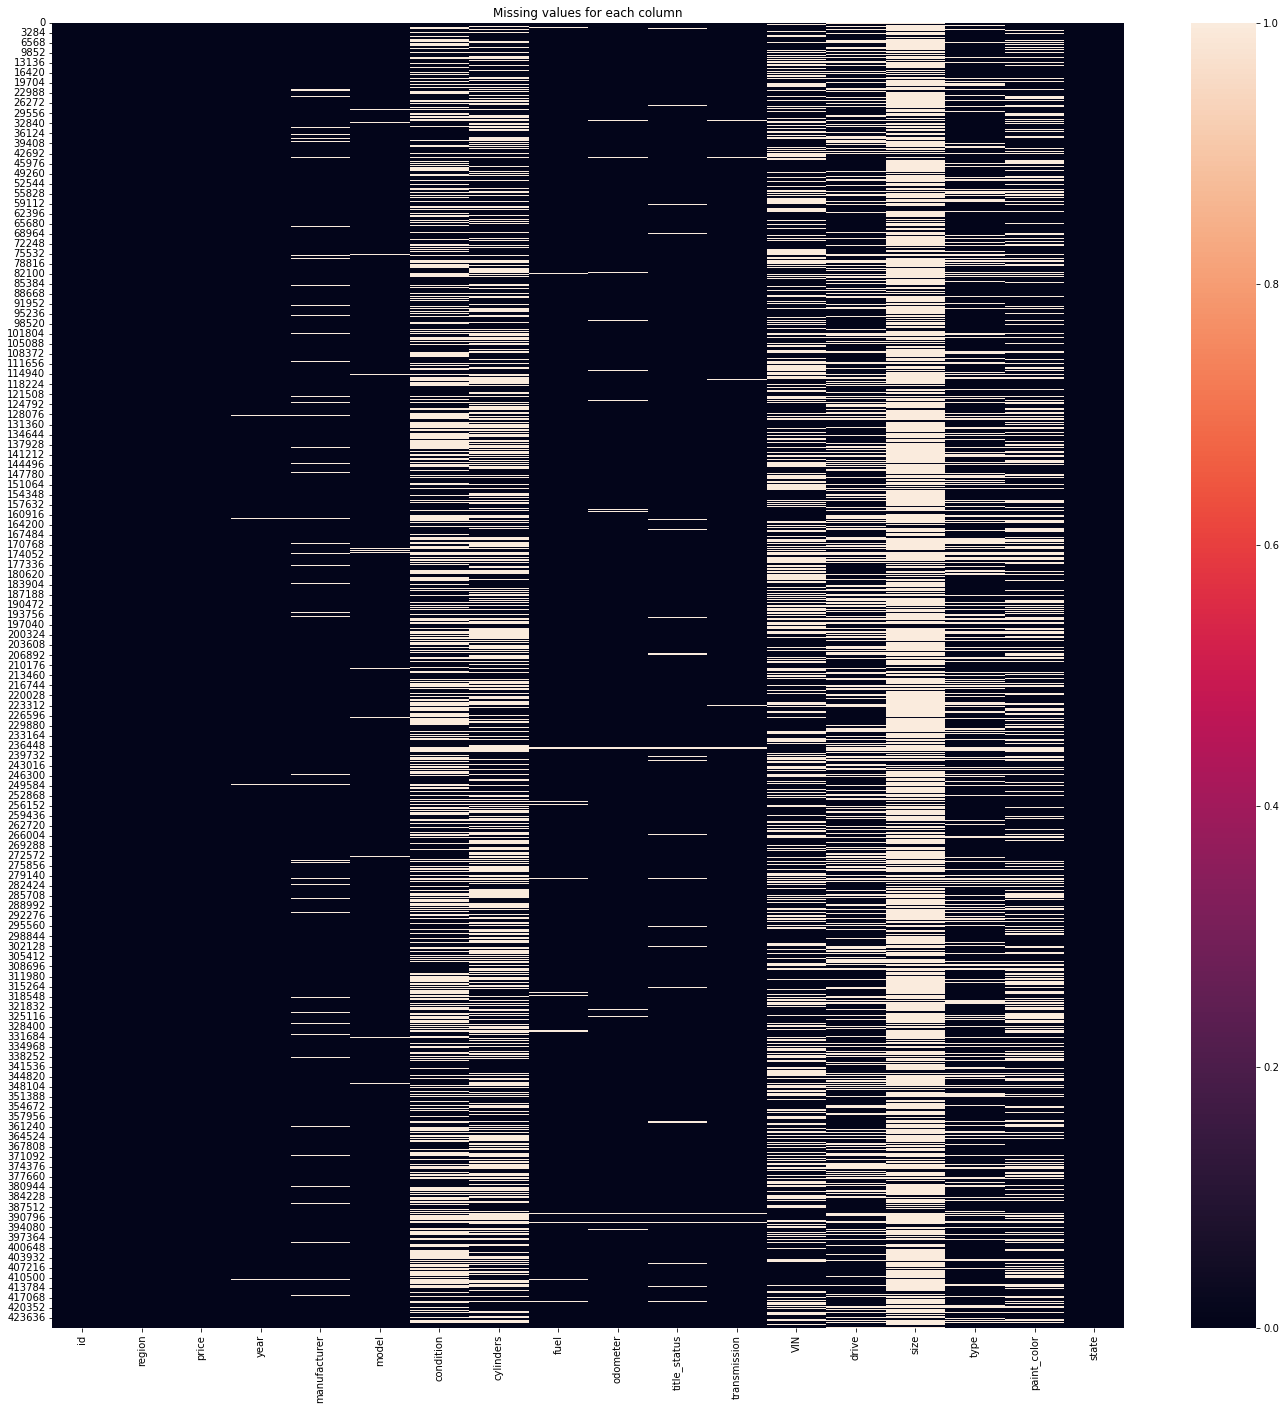

In [4]:
plt.figure(figsize=(24,24))
plt.title("Missing values for each column")
sns.heatmap(cars.isnull())
plt.show()

In the above heatmap, the white spaces show the missing values in the dataset. Our first instinct might be to drop the rows where there are missing values but we will lose significant amount of data in the process. We have pick and choose where want to drop the data, impute the missing values and maybe remove the features from our model which have too many missing values.

In [5]:
#Describing the dataset
cars.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [6]:
#info() 

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

### Quality Issues:
1. Out of the 18 features in the dataset only 4 of them are numerical values, of which one of them is 'price' which is our target variable for the regression model we will build. This dataset has high cardinality categorical features.

2. We can see that there are a lot of missing values and incorrect values in the dataset. For example, for a used car dataset we have too any cars with 0 miles on the 'odometer' which is odd. 

## Data Preparation

Here we will be working through various features in the dataset to visualize and understand the features better. This will allow to make better decisions on solutions to the quality issues mentioned earlier.

## Feature Engineering 

### id 
'id' doesn't provide any useful information. It is the transaction id of the sale from the website from where the data was scraped. 

In [7]:
#Dropping 'id'
cars.drop(['id'],axis=1,inplace=True)

### State and Region

For the sake of this project we are not considering geographical location(which includes both state & location) in our regression model.

In [8]:
#Dropping 'region' & 'state'
cars.drop(['region','state'],axis=1,inplace=True)

### Price 

This feature shows the price the vehicle was sold for. This will be our target 'y' in our regression model to predict the prices.

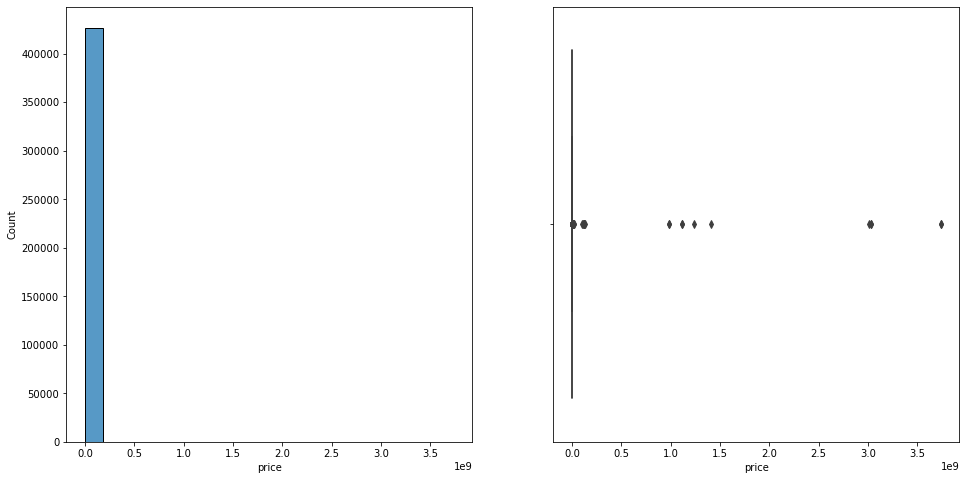

In [9]:
#converting the datatype to integer
cars.price.astype('int')

#Plotting the histogram of 'price'
plt.figure(figsize=(16,8))
plt.subplot(121)
sns.histplot(data=cars,x='price',bins=20)
plt.subplot(122)
sns.boxplot(data=cars,x='price');

In [10]:
cars.price.value_counts()

0        32895
6995      3169
7995      3129
9995      2867
8995      2837
         ...  
21298        1
49217        1
63195        1
19709        1
17873        1
Name: price, Length: 15655, dtype: int64

The prices of the cars in our dataset are heavily skewed. Removing the top and bottom 10 percentile of the data to remove the outliers. These are arbitrary values and can be adjusted based on the performance of the model. 

In [11]:
#Dropping rows in top and bottom 10 percentile of the price distribution. 

p90, p10 = np.percentile(cars['price'], [90 ,10])
print('Row count before:',cars.shape[0])
cars = cars[cars['price'].between(p10,p90)]
print('Row count after:',cars.shape[0])

Row count before: 426880
Row count after: 342632


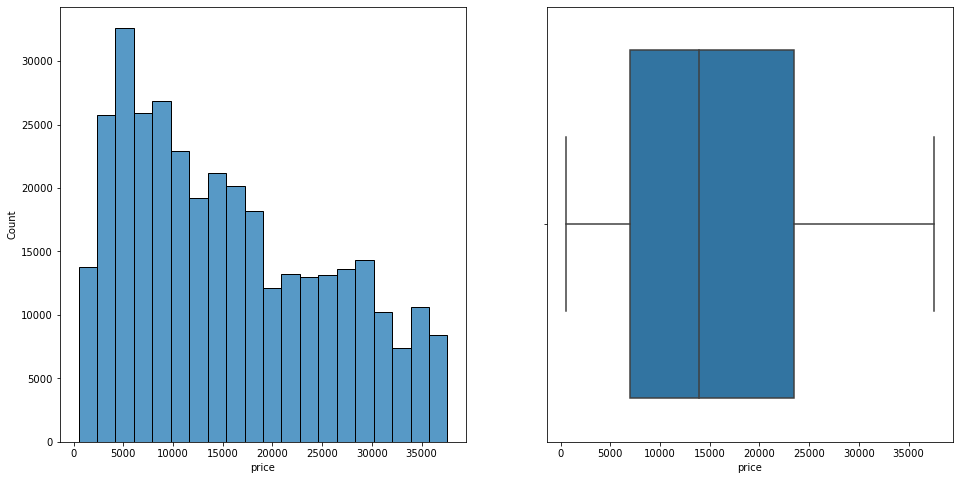

In [12]:
#plotting prices again

plt.figure(figsize=(16,8))
plt.subplot(121)
sns.histplot(data=cars,x='price',bins=20)
plt.subplot(122)
sns.boxplot(data=cars,x='price');

Here the price distribution looks much better.

### Year

The feature 'year' refers to the manufacturing year of the car sold.

<AxesSubplot:xlabel='year', ylabel='Count'>

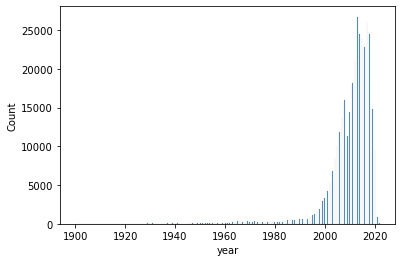

In [13]:
#plotting the histogram of the manufactuing year of the cars 

sns.histplot(data=cars,x='year')

In [14]:
print(f"Most recent year: {cars.year.max()}\nOldest year: {cars.year.min()}")
print("Cars with no manufacturing year value:",cars.year.isnull().sum())

Most recent year: 2022.0
Oldest year: 1900.0
Cars with no manufacturing year value: 628


### Age

- Given the manufacturing year of the car and the max year value in the dataset, we can create a new feature called 'age' which gives us a better idea about the car.
- Most of the car have been manufactured in the last 20 years or so. Let's look at the more recent car sales data.

In [15]:
#Dropping the rows with no year value

cars = cars[cars.year.notnull()]

#Calculate the age of the car and store it in a new column 'age'
cars['age'] = cars.year.apply(lambda x: int(2020-x))
print('Row count before:',cars.shape[0])

#Considering more recently manufactured cars(>2000)
cars = cars[cars['age'].between(0,23)]
print('Row count after filtering age:',cars.shape[0])

#dropping the 'year' feature 
print('Feature count',cars.shape[1])
cars.drop('year',axis=1,inplace=True)
print('Feature count after',cars.shape[1])

Row count before: 342004
Row count after filtering age: 324490
Feature count 16
Feature count after 15


/Users/nikhil/Portfolio/used-car-price-prediction/env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


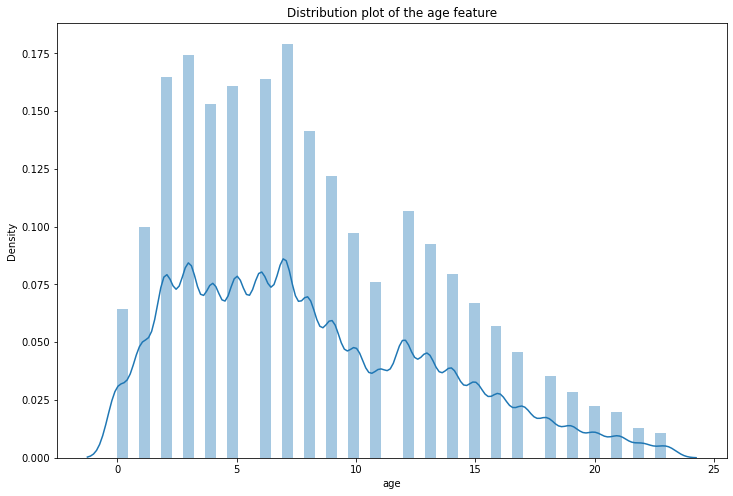

In [16]:
#Plotting the age distribution
plt.figure(figsize=(12,8))
plt.title("Distribution plot of the age feature")
sns.distplot(cars.age);

From the above distribution plot of 'age' our new feature, we can see that most cars sold are between 1-10 years. By creating this column we can further access the relationship between the 'price' of the car and it's age.

__Note__: The drawback of utilizing this feature is that if a car has been sitting in the lot before it was sold. Even though people consider it a new car, the age will be higher than 0 depending on how long its been sitting in the lot.

So here our assumption is that the car was sold immediately after it was manufactured.

## Condition

good         100260
excellent     82561
like new      16504
fair           4776
new             518
salvage         436
Name: condition, dtype: int64


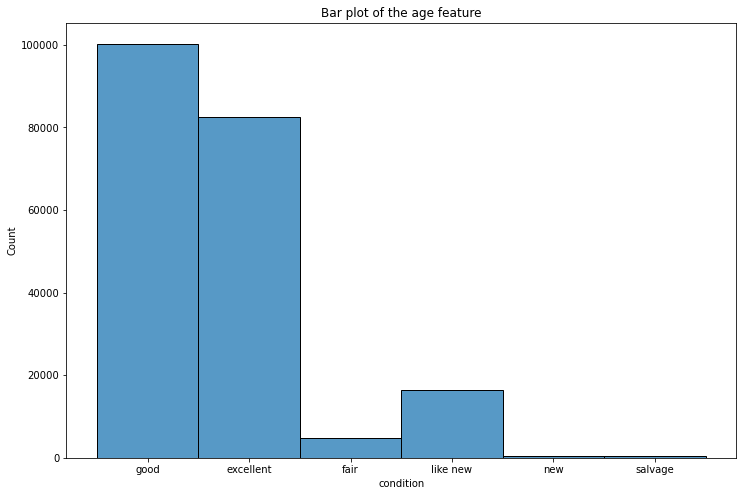

In [17]:
#Checking the value counts of various condition types
print(cars.condition.value_counts())

#Plotting the 'condition' feature
plt.figure(figsize=(12,8))
plt.title("Bar plot of the age feature")
sns.histplot(data=cars,x='condition');

### New Condition

Looking at the condition feature, we can see that it is classified into 6 categories. Some of these categories are redudant in nature. Also we have to keep in mind that the categorical features have to be encoded before being fed to the ML model. 

A common used ecoding method called 'One Hot Encoding' or 'dummy encoding' will increase our columns in our dataset by the cardinality of the feature. But also taking into account the curse of dimensionality, it would serve us better to reduce the categories even though we are losing some variance in the data. 

__Note__: 
- Instead of the naming the grouped features with new names, I am directly assigning them numerical values.
- I am imputing the 'condition' feature with the mode.


In [18]:
#minimizing the categorical features in condition column

conditions = [
    (cars['condition'].isin(['new','like new'])),
    (cars['condition'].isin(['good','excellent'])),
    (cars['condition'].isin(['fair','salvage']))
    ]

# creating a list of the values we want to assign for each condition
values = [1,2,3]

# create a new column and use np.select to assign values to it using our lists as arguments

#Here I am making an assumption that the car is only sold if it atleast in a 'good' condiiton. This is equivalent 
#to imputing the 'condition' column with its mode. 
cars['new_condition'] = np.select(conditions, values,default=2)
cars.head()

,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,age,new_condition
27,33590,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,6,2
28,22590,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,10,2
30,30990,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,3,2
31,15000,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,7,2
32,27990,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,1GT220CG8CZ231238,4wd,NaN,pickup,black,8,2


Dropping the rows where the title of the car is missing and where the transactions are 'parts only' as these will skew the 'price' target variable. 

In [19]:
#dropping car sales with missing titles and part sales

print('Row count:',cars.shape[0])
cars.drop(cars[cars.title_status.isin(['missing','parts only'])].index,inplace=True)
cars.title_status.value_counts()
print('Row count after',cars.shape[0])

Row count: 324490
Row count after 324186


### Dropping all other features 

For out first iteration of the model we are dropping the high cardinality categorical features. 

In [20]:
#Dropping columns

cars.drop(['model','condition','cylinders','fuel','title_status','transmission','VIN','drive','size','type','paint_color'],axis=1,inplace=True)
print('Feature count',cars.shape[1])

Feature count 5


## Modeling

As discussed in the Business Understanding, we need a model which can predict the price of the car by looking at various features of the car. This is a regression problem. Let's build a simple Linear Regression model for our for first iteration of the solution.

### Test Train Split

Creating a test and training datasets for testing purposes but this also helps in preventing data leakage.

In [21]:
#test train split

from sklearn.model_selection import train_test_split

X = cars[['odometer','age','new_condition','manufacturer']]
y = cars.price

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Preprocessing Pipeline

Here I'm splitting the dataset into categorical and numerical columns as I would like to process differently. This way the standard scaler applied to the numerical features doesn't affect the one hot encoded categorical features.

- In the categorical pipeline, I'm imputing missing values by it's Mode. Then one hot encoding them. 
- In the numerical pipeline, we are imputing the missing values by its Median and then scaling the data using a Standard Scaler.
- Both these pipelines are combined using a column transformer which applies pipelines only to columns listed. 

This will be our Preprocessor pipeline. 


In [22]:
#Preprocessing Pipeline

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#Seperating Categorical columns
cat_cols = ['new_condition','manufacturer']

#Seperating Numerical columns
num_cols = ['odometer','age']

#Pipeline for Categorical features
cat_pipe = Pipeline([
    ('imp',SimpleImputer(strategy="most_frequent")),
    ('ohe',OneHotEncoder())
])

#Pipeline for Numerical features
num_pipe = Pipeline([
    ('simp',SimpleImputer(strategy="median")),
    ('ss',StandardScaler())
])

#Column transformer which combines our individual pipelines
preprocessor = ColumnTransformer([
    ('cat_col',cat_pipe,cat_cols),
    ('num_col',num_pipe,num_cols)
],remainder = 'passthrough')

### Model Pipeline

For our first iteration if this project, we will be working with a simple Linear Regression model. Linear Regression can be used to fit a model to an observed dataset of explanatory variables and their target reponses with the below mathematical equation:

$$
Y_i = f(X_i,\beta) + e_i
$$

We will use another Pipeline where the first step will be our Preprocessor Pipeline that we built in our previous step combined with our regression model. 



In [23]:
#Model building Pipeline 

from sklearn.linear_model import Ridge,LinearRegression


model = Pipeline([
    ('preprocessor',preprocessor),
    ('model',LinearRegression())
])
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_col',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['new_condition',
                                                   'manufacturer']),
                                                 ('num_col',
                                                  Pipeline(steps=[('simp',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['odometer', 'age'])])),
                ('model', LinearRegression())])

In [24]:
#Fitting our model onto the training data.


model.fit(X_train,y_train);

### Model Evaluation

We can use the Pipeline handy method called score() which uses the score method of the last modelin the pipeline. In our case, it will give us the R^2 score. 

R-Squared score gives us the percentage of variance in the dependant variables that the independant variables explain collectively. 

In [25]:
#Score on traning data

model.score(X_train,y_train)

0.4880883500871097

0.488 is our R^2 score, which is pretty low for our model. Let's test our model on test data.

In [26]:
#Score on testing data

model.score(X_test,y_test)

0.48459386570974317

### Results

We can see that the model performs worse on the test set, which to be expected. The above scores are not very impressive. 

There are 2 mains reaons for this poor performance:
1. We have omiited a lot of features in from the original dataset which causes a loss of information that we being fed to the model.
2. We have used a fairly simple Regression alogorithm for our model as this model assumes a linear realtionship amongst the features and the target variable.

### Decision Tree Regressor
		
Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

This model is more suitable where we are dealing with features with high cardinality. 

__Note__: Keeping the preprocessor pipeline, we are changing only the model.

In [27]:
#Using Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

model_dt = Pipeline([
    ('preprocessor',preprocessor),
    ('model',DecisionTreeRegressor())
])
model_dt

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_col',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['new_condition',
                                                   'manufacturer']),
                                                 ('num_col',
                                                  Pipeline(steps=[('simp',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['odometer', 'age'])])),
                ('model', DecisionTreeRegressor())])

In [28]:
#Fitting the Decision Tree Regressor 
model_dt.fit(X_train,y_train);

In [29]:
#Score on traning data

model_dt.score(X_train,y_train)

0.9765454418373265

Using the score method from the sklearn's Pipeline, we get 98% accuracy. This is score is deceiving because the decision tree regressors are notorious for overfitting. Using this model we can test the accuracy on the test set, which will provide us a much better picture of the accuracy.

In [30]:
# Score on testing data

model_dt.score(X_test,y_test)

0.6943886112017669

So instantly we see that our model's R^2 score is 0.69 which is significantly higher than 0.48 

## Further Improvements:

1. Rather than using the One hot encoding or the dummy encoding, using target encoding is a great alternative for categorical features with high caridnality.

2. Trying different methods of Imputation.

3. Regression based on geographical location.

4. Adding more features into the model.



### LASSO 

In [32]:
#Building the same pipeline but this time with a LASSO regressor

from sklearn.linear_model import Lasso


model_lasso = Pipeline([
    ('preprocessor',preprocessor),
    ('las',Lasso(alpha=0.1))
])
model_lasso

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_col',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['new_condition',
                                                   'manufacturer']),
                                                 ('num_col',
                                                  Pipeline(steps=[('simp',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['odometer', 'age'])])),
                ('las', Lasso(alpha=0.1))])

In [33]:
#fitting the model

model_dt.fit(X_train,y_train);

In [35]:
#Score on traning data

print("Train score:",model_dt.score(X_train,y_train))

# Score on testing data

print("Test score:",model_dt.score(X_test,y_test))

Train score: 0.9765454418373265
Test score: 0.6941515586286982


In [39]:
#running grid search to optimnize the hyperparameters

from time import time
from sklearn.model_selection import GridSearchCV

param_grid = {
    "las__alpha": np.power(10, np.arange(-2, 1, dtype=float)),
}

# run grid search
grid_search = GridSearchCV(model_lasso, param_grid=param_grid)
start = time()
grid_search.fit(X_train, y_train)

print(
    "GridSearchCV took %.2f seconds for %d candidate parameter settings."
    % (time() - start, len(grid_search.cv_results_["params"]))
)
report(grid_search.cv_results_)

/Users/nikhil/Portfolio/used-car-price-prediction/env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171710436491.5752, tolerance: 1936096384.79191
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/nikhil/Portfolio/used-car-price-prediction/env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 314481121371.31934, tolerance: 1934279502.3217688
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/nikhil/Portfolio/used-car-price-prediction/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nikhil/Portfoli

/Users/nikhil/Portfolio/used-car-price-prediction/env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10566237225.3125, tolerance: 1935331922.5479977
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/nikhil/Portfolio/used-car-price-prediction/env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2853676012.7382812, tolerance: 1935476838.1190207
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/nikhil/Portfolio/used-car-price-prediction/env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73438053664.37305, tolerance: 1932358542.2537751
  model = cd_fa

GridSearchCV took 176.24 seconds for 3 candidate parameter settings.


/Users/nikhil/Portfolio/used-car-price-prediction/env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 245725383330.64062, tolerance: 2418389267.7479014
  model = cd_fast.sparse_enet_coordinate_descent(


NameError: name 'report' is not defined